In [1]:
import pandas as pd
import numpy as np

In [2]:
import numpy as np


In [3]:

import scipy.stats as sst


def get_edfs(x1,x2, sorter=None):
    if sorter is None:
        vals=np.concatenate([x1,x2])
        sorter=np.argsort(vals)
    edf1=np.concatenate([np.ones_like(x1)/x1.shape[0],np.zeros_like(x2)])[sorter]
    edf2=np.concatenate([np.zeros_like(x1), np.ones_like(x2)/x2.shape[0]])[sorter]
    return np.cumsum(edf1), np.cumsum(edf2)


In [4]:

import scipy.special as ssp

In [5]:

def logbeta(i,j):
    return ssp.loggamma(i) + ssp.loggamma(j)-ssp.loggamma(i+j)

def logbinom(i,j):
    
    return ssp.loggamma(i) + ssp.loggamma(j)-ssp.loggamma(i+j)

In [6]:


logbeta(100,14)
features= np.random.randn(300,10)

In [7]:
(85+115)/(85*115)
ssp.binom(85+115,115)*ssp.beta(86,116)





# np.exp(np.log(ssp.binom(85+115,115))+ssp.loggamma(86)+ssp.loggamma(116)- ssp.loggamma(86+116))


0.004975124378109453

In [8]:

ssp.gamma(11)/ssp.gamma(6)/ssp.gamma(6)-   ssp.binom(10,5)

def logbinom(i,j):
    return ssp.loggamma(i+j+1) - ssp.loggamma(i+1)-ssp.loggamma(j+1)

In [9]:

import numpy as np
def loglik_edf(feature, target):
    s=np.argsort(feature)
    target_cl1_below=np.concatenate([[0],np.cumsum(target[s])])
    target_cl0_below=np.concatenate([[0],np.cumsum(1-target[s])])

    target_cl1_above=np.sum(target[s]) - target_cl1_below
    target_cl0_above=np.sum(1-target[s]) - target_cl0_below
    return target_cl1_below
    # target_cl0_above+target_cl0_below
    proba_below = (1+target_cl1_below)/ (target_cl0_below + target_cl1_below+2)
    proba_above = (1+target_cl1_above)/ (target_cl0_above + target_cl1_above+2)


    loglik = np.log(proba_below)* target_cl1_below + np.log(1-proba_below) * (target_cl0_below) +\
    np.log(proba_above)* target_cl1_above + np.log(1-proba_above) * (target_cl0_above)

    edf = np.cumsum(np.exp(loglik - np.max(loglik)))
    edf = edf /edf[-1]
    return edf,feature[s], np.argmax(loglik),np.max(loglik)



In [10]:
x=sst.norm(0,1).rvs(100)
np.sum(x**2*sst.norm.pdf(x))

13.083024303278316

In [355]:


# target
# import matplotlib.pyplot as plt
# plt.hist(X1.ravel(), alpha=0.4)
# plt.hist(X2.ravel(),alpha=0.5)

In [118]:

from collections import namedtuple

Splitpoint = namedtuple('Splitpoint',['stat', 'point','idxpoint','idx_feature','counts','total_stat'],
                       defaults=[0.,0,0,0,0,0])


def twosample_to_featuretarget(x1,x2):
    return np.concatenate([x1,x2]),np.concatenate([np.zeros_like(x1),np.ones_like(x2)])
    
def featuretarget_to_twosample(ft,tar):
    return ft[tar==0], ft[tar==1]

def rate_split(feature, target):
    s=np.argsort(feature)
    x1,x2=featuretarget_to_twosample(feature,target)
    target_cl1_below=np.concatenate([[0],np.cumsum(target[s])])
    target_cl0_below=np.concatenate([[0],np.cumsum(1-target[s])])

    target_cl1_above=np.sum(target[s]) - target_cl1_below
    target_cl0_above=np.sum(1-target[s]) - target_cl0_below
    proba_below = (1+target_cl1_below)/ (target_cl0_below + target_cl1_below+2)
    proba_above = (1+target_cl1_above)/ (target_cl0_above + target_cl1_above+2)


    loglik1 = np.log(proba_below)* target_cl1_below + np.log(1-proba_below) * (target_cl0_below) +\
        np.log(proba_above)* target_cl1_above + np.log(1-proba_above) * (target_cl0_above)

    ev=logbeta(target_cl0_below+1, target_cl1_below+1)+logbeta(target_cl0_above+1, target_cl1_above+1)
    evidence1=ssp.logsumexp(
    logbeta(target_cl0_below+1, target_cl1_below+1)+logbeta(target_cl0_above+1, target_cl1_above+1)
    )- np.log(target.shape[0])
    

    split_point=0
    evidence=-1e300
    if len(feature) > 0:
        split_point=feature[s][np.argmax(ev)]
        evidence=evidence1
    return loglik1,evidence,s, Splitpoint(point=split_point,
            counts=[int(np.sum(x1>=split_point)),int(np.sum(x2>=split_point)),len(x1),len(x2)])


def rate_cat_split(cl1bin0, cl0bin0,cl1bin1, cl0bin1):
    cl1=cl1bin0+cl1bin1
    cl0=cl0bin0+cl0bin1
    
    proba0=(cl1+1)/(cl1+cl0+2)
    evidence0=logbeta(cl1+1, cl0+1)
    loglik0=(np.log(proba0) * cl1 + np.log(1-proba0) * cl0)
    
    posterior0= loglik0- evidence0
    
    probab0=(cl1bin0+1)/(cl1bin0+cl0bin0+2)
    evidenceb0=logbeta(cl1bin0+1, cl0bin0+1)
    loglikb0=(np.log(probab0) * cl1bin0 + np.log(1-probab0) * cl0bin0)
    
    probab1=(cl1bin1+1)/(cl1bin1+cl0bin1+2)
    evidenceb1=logbeta(cl1bin1+1, cl0bin1+1)
    loglikb1=(np.log(probab1) * cl1bin1 + np.log(1-probab1) * cl0bin1)
    posterior1 = (loglikb1+loglikb0) - (evidenceb1+evidenceb0)
    
    return -evidence0+(evidenceb1+evidenceb0),  evidence0,(evidenceb1+evidenceb0)
    
    

def rate_all_splits(features, target):
    data=[]
    proba0=(np.sum(target)+1)/(target.shape[0]+2)
    evidence0=logbeta(np.sum(target)+1, np.sum(1-target)+1)
    loglik0=(np.log(proba0) * np.sum(target) + np.log(1-proba0) * np.sum(1-target))
    for i in range(features.shape[1]):
        loglik1,evidence1,s,split = rate_split(features[:,i], target)
        data.append(dict(i=i,loglik=loglik1, evidence=evidence1, split=split._replace(idx_feature=i,
                stat=evidence1-evidence0)))
#     logliks=[d['maxloglik'] for d in data]
    evidence = [d['evidence'] for d in data]
    maxevidence = np.max(evidence)
    arg = np.argmax(evidence)
    
    total_evidence = ssp.logsumexp(evidence)-np.log(features.shape[1])
    best_choice = data[arg]
    
    data= sorted(data,key=lambda x: x['evidence'])
    
    return total_evidence- evidence0, [d['split'] for d in data]

    
    
        

In [119]:

def test():
    x1=np.random.randint(0,2,5000)
    x2=np.random.randint(0,2,5000)
    return rate_cat_split(np.sum(x1),np.sum(1-x1),np.sum(x2),np.sum(1-x2))

sample=np.array([test() for _ in range(200000)])

CPU times: user 23 s, sys: 59.9 ms, total: 23 s
Wall time: 23.1 s


In [120]:

sample

array([[-3.41271757e+00, -6.93565908e+03, -6.93907179e+03],
       [-3.68569200e+00, -6.93549849e+03, -6.93918418e+03],
       [-3.66228216e+00, -6.93563348e+03, -6.93929576e+03],
       ...,
       [-2.91779028e+00, -6.93584406e+03, -6.93876185e+03],
       [-3.68565710e+00, -6.93584806e+03, -6.93953372e+03],
       [-3.66656573e+00, -6.93475613e+03, -6.93842269e+03]])

(array([3.40842997e+00, 1.21462288e+00, 9.70328341e-01, 6.53034105e-01,
        4.90644040e-01, 4.43331237e-01, 3.14945720e-01, 2.86861389e-01,
        2.59706678e-01, 2.35242974e-01, 1.60824388e-01, 1.98987765e-01,
        1.33278257e-01, 1.20018930e-01, 1.05047143e-01, 9.91758545e-02,
        8.64058012e-02, 5.32819465e-02, 7.32443287e-02, 6.48777420e-02,
        3.69891199e-02, 4.78510043e-02, 3.28302903e-02, 2.80843318e-02,
        3.84569421e-02, 2.42190666e-02, 1.83477777e-02, 1.80052859e-02,
        1.79074311e-02, 1.54121333e-02, 1.48250044e-02, 1.18404326e-02,
        1.13511585e-02, 1.10086666e-02, 8.51336886e-03, 8.95371553e-03,
        7.63267553e-03, 6.65412739e-03, 6.60519998e-03, 2.44637036e-03,
        6.11592591e-03, 4.15882962e-03, 4.55024887e-03, 1.76138666e-03,
        3.91419258e-03, 3.32706369e-03, 2.10387851e-03, 2.54422518e-03,
        2.10387851e-03, 1.17425777e-03, 1.66353185e-03, 7.33911109e-04,
        1.32104000e-03, 1.46782222e-03, 7.82838516e-04, 1.125330

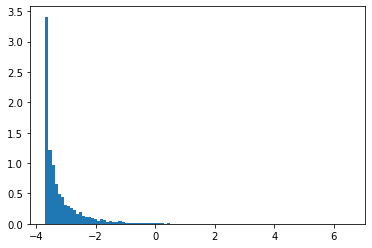

In [122]:
import matplotlib.pyplot as plt

plt.hist(sample[:,0],bins=100,density=True)

In [131]:
np.mean(sample>0)

0.0023366666666666666

In [129]:

def test2():
    x1=np.random.randint(0,2,500)
    x2=np.random.randint(0,2,500)
    return rate_cat_split(np.sum(x1),np.sum(1-x1),np.sum(x2),np.sum(1-x2))

sample2=np.array([test2() for _ in range(200000)])

In [145]:

np.min(sample[:,0])+np.log(5000)/2,np.min(sample2[:,0])+np.log(500)/2

(0.5714625346266677, 0.5633584005927768)

In [293]:

np.sqrt((k1*k2)*2/(k2+k1))

31.622776601683793

In [354]:

for i in [10,20,30,50,60,70,80,90,100,120,140,160,200]:
    k1,k2=i,i
    # k1,k2=10,1010101010101010
    def test2():
        x1=np.random.randint(0,2,k1)
        x2=np.random.randint(0,2,k2)
        return rate_cat_split(np.sum(x1),np.sum(1-x1),np.sum(x2),np.sum(1-x2))

    sample3=np.array([test2() for _ in range(200000)])
    print (i,"%.4f" % np.mean(sample3[:,0]+np.log(np.sqrt((k1*k2)*2/(k2+k1)))),
    "%.4f" %np.quantile(sample3[:,0]+np.log(np.sqrt((k1*k2)*2/(k2+k1))),0.95))

10 0.9288 2.1332
20 0.9986 2.3061
30 1.0218 2.6231
50 1.0459 2.5258
60 1.0499 2.5486
70 1.0507 2.5943
80 1.0540 2.3630
90 1.0543 2.4317
100 1.0574 2.5103
120 1.0596 2.4320
140 1.0614 2.3936
160 1.0648 2.5820
200 1.0653 2.5602


(array([469., 193., 153., 101.,  88.,  98.,  67.,  74.,  50.,  51.,  44.,
         45.,  37.,  38.,  45.,  36.,  30.,  30.,  23.,  23.,  16.,  14.,
         15.,  17.,  12.,  10.,  14.,  13.,   9.,  20.,   6.,   6.,   7.,
          5.,  10.,   8.,   5.,   4.,   7.,   7.,   2.,   6.,   8.,   2.,
          4.,   2.,   1.,   8.,   5.,   3.,   1.,   7.,   1.,   3.,   3.,
          4.,   3.,   2.,   1.,   0.,   3.,   1.,   3.,   3.,   1.,   2.,
          0.,   3.,   3.,   0.,   1.,   2.,   0.,   0.,   1.,   1.,   0.,
          0.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.56471706, 0.6140289 , 0.66334074, 0.71265258, 0.76196442,
        0.81127625, 0.86058809, 0.90989993, 0.95921177, 1.00852361,
        1.05783544, 1.10714728, 1.15645912, 1.20577096, 1.2550828 ,
        1.30439463, 1.35370647, 1.40301831, 1.45233015, 1.50164199,
        1.55095382, 1.60026566, 1.6495775 , 1.

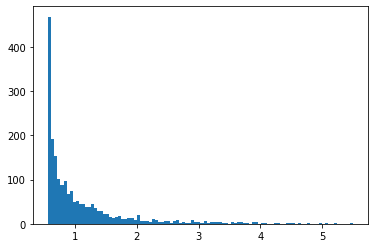

In [331]:
plt.hist(sample3[:,0]+np.log(np.sqrt((k1*k2)*2/(k2+k1))),bins=100)

In [13]:

def f(p):
    return p**100

x=np.arange(0,1,0.001)
x+= x[1]/2
np.sum(f(x)/x.shape[0])

0.009896824611116316

In [356]:

# import numpy as np
# def sample():
#     X1=np.random.randn(300,1)
#     X2=np.random.randn(300,1)+0.
#     features=np.concatenate([X1,X2])#.reshape(-1,1)
#     target= np.concatenate([np.zeros_like(X1[:,0]),np.ones_like(X2[:,0])])
#     xt,x0,_=rate_all_splits(features,target)

#     return xt-x0
# np.exp(sample())

In [15]:
X1=np.random.randn(30000,3)-0.0
X2=np.random.randn(30000,3)+0.0
features=np.concatenate([X1,X2])#.reshape(-1,1)
target= np.concatenate([np.zeros_like(X1[:,0]),np.ones_like(X2[:,0])])

rate_all_splits(features,target)

(-3.5236660500595463,
 [Splitpoint(stat=-3.7666412197213504, point=-3.76625240735568, idxpoint=0, idx_feature=2, counts=[30000, 29991, 30000, 30000], total_stat=0),
  Splitpoint(stat=-3.7079234071061364, point=3.796696497620582, idxpoint=0, idx_feature=1, counts=[2, 0, 30000, 30000], total_stat=0),
  Splitpoint(stat=-3.198697379739315, point=2.9927841316439108, idxpoint=0, idx_feature=0, counts=[59, 28, 30000, 30000], total_stat=0)])

In [357]:

# ll, ev, s=rate_split(features[:,1], target)


In [358]:

# loglik1, evidence1=rate_split(feature,target)

In [18]:

evidence0=logbeta(np.sum(target)+1, np.sum(1-target)+1)

In [19]:

(np.log(0.5) * 300 + np.log(0.5) * 300)-evidence0

41178.217796328536

In [20]:

loglik1.max()-evidence1

NameError: name 'loglik1' is not defined

In [21]:

from nltk.corpus import wordnet

In [22]:

import collections
INode=namedtuple('Node', ['feature','threshold','lc','rc','counts'],defaults=[-1,0,None,None,None])

def serializer(obj):
    if isinstance(obj, list):
        return obj
    if isinstance(obj,float) or isinstance(obj,np.float64):
        return round(obj,3)
    elif hasattr(obj,'__dict__'):
        return vars(obj)
    else:
        str(obj)


SplitProposal=namedtuple('SplitProposal', ['node','fidx','split','side'])
feature_use_per_path=5
class Node(object):
    def __init__(self, feature=-1, threshold=0,lc=None, rc=None,counts=None,options=None, 
                 pval_threshold=0.01,
                feature_use_per_path=3
                ):
        self.feature=feature
        self.threshold=threshold
        self.lc=lc 
        self.rc=rc
        self.counts=counts
        self.options = options
        self.pval_threshold=pval_threshold
        self.feature_use_per_path=feature_use_per_path
    @staticmethod
    def initialize_node(X,y, feature_use_per_path=3, pval_threshold=1):
#         splits=[(i,kssplitter(*featuretarget_to_twosample(a, y))) for (i,a) in enumerate(X)]
#         splits=sorted([s for s in splits],key=lambda x: x[1].pvalue)
        
# #         splits2 = sorted([s for s in splits if s[1].pvalue < pval_threshold],key=lambda x: x[1].pvalue)
        
#         split = splits[0]
        evidence, splits=rate_all_splits(X,y)
        split=splits[-1]
        return Node(split.idx_feature, split.point,counts=split.counts,feature_use_per_path=feature_use_per_path, pval_threshold=pval_threshold)
    def __repr__(self):
        import json
        return json.dumps(self.__dict__, default=serializer)
    def to_json(self):
        import json
        return json.dumps(self.__dict__, default=serializer)
    
    def options_to_consider(self, X: np.ndarray, y: np.ndarray, pruned_features=None):
        if pruned_features==None:
            pruned_features=[]
        pruned_features = pruned_features+ [self.feature]
        c=dict(collections.Counter(pruned_features))
        feature = X[:,self.feature]
        f = feature > self.threshold
        total_splits=[]
        changes_done=False
        if self.lc is None and np.sum(~f)>2:
            evidence, splits=rate_all_splits(X[~f], y[~f])
            splits = [s for s in splits if s.idx_feature not in c or c[s.idx_feature] < self.feature_use_per_path]
            if evidence > self.pval_threshold and len(splits)>0:
                split=splits[-1]
                self.lc = Node(split.idx_feature, split.point,counts=split.counts,feature_use_per_path=feature_use_per_path, pval_threshold=self.pval_threshold)
                changes_done = True
#             splits=[SplitProposal(self,i,kssplitter(*featuretarget_to_twosample(X[i,~f], y[~f])),'l') 
#                     for i in range(X.shape[0])
#                     if (i not in c or c[i]< self.feature_use_per_path)
#                    ]
#             total_splits+= [s for s in splits if s.split.pvalue < self.pval_threshold]
        else:
            if np.sum(~f)>2:
                changes_done = changes_done or self.lc.options_to_consider(X[~f],y[~f],pruned_features )
        if self.rc is None and np.sum(f)>2:
            
            evidence, splits=rate_all_splits(X[f], y[f])
            splits = [s for s in splits if s.idx_feature not in c or c[s.idx_feature] < self.feature_use_per_path]
            if evidence > self.pval_threshold and len(splits)>0:
                split=splits[-1]
                self.rc = Node(split.idx_feature, split.point,counts=split.counts,feature_use_per_path=feature_use_per_path, pval_threshold=self.pval_threshold)
                changes_done = True
        else:
            
            if np.sum(f)>2:
                changes_done = changes_done or self.rc.options_to_consider(X[f],y[f],pruned_features )
        return changes_done
        #,key=lambda x: x[1].pvalue)
            
    def apply_proposal(self, proposal:SplitProposal):
        if proposal.side == 'r':
            self.rc = Node(proposal.fidx, proposal.split.point, None, None, proposal.split.counts)
#             self.rc = Node(proposal.fidx, proposal.split.adjusted_split_point, None, None, proposal.split.counts2)
            
        if proposal.side == 'l':
            self.lc = Node(proposal.fidx, proposal.split.point, None, None, proposal.split.counts)
#             self.lc = Node(proposal.fidx, proposal.split.adjusted_split_point, None, None, proposal.split.counts2)
            
    def iterate_fit(self,X,y):
        return self.options_to_consider(X,y)
    def predict(self, features):
        feature = features[:,self.feature]
        c= self.counts
        proba_right = (1+c[1])/(2+c[0]+c[1])
        proba_left = (1+c[3]-c[1])/(2+c[3]-c[1]+c[2]-c[0])
#         print(proba_left, proba_right)
        f = feature > self.threshold
        result = np.zeros(f.shape[0])
        if self.rc is None:
            result[f] = proba_right
        else:
            result[f]=self.rc.predict(features[f])
            
        if self.lc is None:
            result[~f] = proba_left
        else:
            result[~f]=self.lc.predict(features[~f])
        return result
     
class KSModel(object):
    def __init__(self, feature_use_per_path=3, pval_threshold=0.01):
        self.n=None
        self.pval_threshold=pval_threshold
        self.feature_use_per_path=feature_use_per_path
    
    def fit(self,X,y):
        n=Node.initialize_node(X,y, feature_use_per_path=self.feature_use_per_path,pval_threshold=self.pval_threshold)
        while n.iterate_fit(X,y):
            
            pass
        self.n = n
    def predict(self,X):
        return self.n.predict(X)
        

In [23]:

# train.iloc[:,0:f].values.shape

In [24]:

from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier

import pandas as pd
df=pd.read_csv('/home/krystian/dane/data/sonar.all-data',header=None)

f= 60
df2=df.sample(frac=1,replace=False)
df2[f]=  (df2[f]=='M')*1
train=df2.iloc[0:100]
test=df2.iloc[100:]



dec=DecisionTreeClassifier(min_samples_leaf=10)
dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
x1=(roc_auc_score(test.iloc[:,f].values,p))

dec=KSModel(pval_threshold=0.)
dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
p=dec.predict(test.iloc[:,0:f].values)
x2=(roc_auc_score(test.iloc[:,f].values,p))
print(x1,x2)

0.7857142857142857 0.7350970017636684


In [30]:

import pandas as pd
df=pd.read_csv('/home/krystian/dane/data/data_banknote_authentication.txt',header=None)

def trial():
    f= 4
    df2=df.sample(frac=1,replace=False)
    # df2[f]=  (df2[f]=='M')*1
    train=df2.iloc[0:200]
    test=df2.iloc[200:]

    dec=DecisionTreeClassifier( max_depth=4)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
    x1=(roc_auc_score(test.iloc[:,f].values,p))
    t1= np.mean(test.iloc[:,f].values==((p>0.5)*1))
    # dec=xgboost.XGBRFClassifier()
    # dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    # p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
    # x3=(roc_auc_score(test.iloc[:,f].values,p))

    dec=KSModel(pval_threshold=-0.5)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    
    t2= np.mean(test.iloc[:,f].values==((p>0.5)*1))
    return x1,t1,x2,t2

trials=[trial() for x in range(100)]

In [29]:


trials=np.array(trials)
np.mean(trials,axis=0), np.std(trials, axis=0)

(array([0.95099574, 0.93536689, 0.94957729, 0.92591297]),
 array([0.01743382, 0.01943834, 0.0190511 , 0.01941199]))

In [40]:

df=pd.read_csv('/home/krystian/dane/data/sonar.all-data',header=None)
df.shape

(208, 61)

In [311]:

df=pd.read_csv('/home/krystian/dane/data/sonar.all-data',header=None)

def trial():
    f= 60
    df2=df.sample(frac=1,replace=False)
    df2[f]=  (df2[f]=='M')*1
    train=df2.iloc[0:100]
    test=df2.iloc[100:]



    dec=DecisionTreeClassifier(min_samples_leaf=10)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
    x1=(roc_auc_score(test.iloc[:,f].values,p))

    dec=KSModel(pval_threshold=0.1)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    return x1,x2

trials=np.array([trial() for _ in range(50)])

In [312]:



trials=np.array(trials)
np.mean(trials,axis=0), np.std(trials, axis=0)

(array([0.75506847, 0.73644532]), array([0.04625768, 0.05451641]))

In [293]:


df=pd.read_csv('/home/krystian/dane/data/pima-indians-diabetes.csv',header=None)

def trial():
    f= 8
    df2=df.sample(frac=1,replace=False)
    # df2[f]=  (df2[f]=='M')*1
    train=df2.iloc[0:400]
    test=df2.iloc[400:]

    dec=DecisionTreeClassifier( max_depth=5,)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
    x1=(roc_auc_score(test.iloc[:,f].values,p))

    # dec=xgboost.XGBRFClassifier()
    # dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    # p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
    # x3=(roc_auc_score(test.iloc[:,f].values,p))

    dec=KSModel(pval_threshold=0.01)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    return x1,x2

trials=[trial() for x in range(100)]

In [294]:



trials=np.array(trials)
np.mean(trials,axis=0), np.std(trials, axis=0)

(array([0.74192591, 0.77311101]), array([0.03199689, 0.024092  ]))

In [319]:

df=pd.read_csv('/home/krystian/dane/data/ionosphere.data',header=None)
specs = [dict(max_depth=3),dict(max_depth=5),dict(max_depth=6), dict(max_depth=8),dict(min_samples_leaf=10),
        dict(max_depth=5, criterion='entropy'),dict(min_samples_leaf=50),dict(min_weight_fraction_leaf=0.01),dict()
        ]
results = []
f=34
for i in range(100):
    df2=df.sample(frac=1,replace=False)
    df2[f]=  (df2[f]=='g')*1
    train=df2.iloc[0:100]
    test=df2.iloc[100:]
    for s in specs:
        dec=DecisionTreeClassifier( **s)
        dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
        p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
        x1=(roc_auc_score(test.iloc[:,f].values,p))
        
        results.append((str(s),x1))

    # dec=xgboost.XGBRFClassifier()
    # dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    # p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
    # x3=(roc_auc_score(test.iloc[:,f].values,p))

    dec=KSModel(pval_threshold=-0.5)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    results.append(("bayes-0.5",x2))
    
    dec=KSModel(pval_threshold=0)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    results.append(("bayes-0",x2))
    
    dec=KSModel(pval_threshold=0.5)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    results.append(("bayes+0.5",x2))

In [320]:



s=pd.Series([r[1] for r in results],[r[0]for  r in results])
s.groupby(s.index).mean()

bayes+0.5                                   0.841965
bayes-0                                     0.853344
bayes-0.5                                   0.858897
{'max_depth': 3}                            0.837639
{'max_depth': 5, 'criterion': 'entropy'}    0.836639
{'max_depth': 5}                            0.836271
{'max_depth': 6}                            0.839876
{'max_depth': 8}                            0.839026
{'min_samples_leaf': 10}                    0.881267
{'min_samples_leaf': 50}                    0.626262
{'min_weight_fraction_leaf': 0.01}          0.839835
{}                                          0.840694
dtype: float64

In [57]:

df=pd.read_csv('/home/krystian/dane/data/pima-indians-diabetes.csv',header=None)
def test_dataset(df, f,preproc=lambda x:x):
    specs = [dict(max_depth=3),dict(max_depth=5),dict(max_depth=6), dict(max_depth=8),dict(min_samples_leaf=10),
            dict(max_depth=5, criterion='entropy'),dict(min_samples_leaf=50),dict(min_weight_fraction_leaf=0.01),dict()
            ]
    specs = [dict(max_depth=3),dict(max_depth=5),dict(max_depth=6), dict(max_depth=8),dict(min_samples_leaf=10),
            dict(max_depth=5, criterion='entropy'),dict(min_samples_leaf=50),dict(min_weight_fraction_leaf=0.01),dict(),
             dict(min_samples_leaf=5),dict(min_samples_leaf=20),dict(min_samples_leaf=10,criterion='entropy')
            ]
    results = []
    for i in range(100):
        df2=df.sample(frac=1,replace=False)
        df2=preproc(df2)
    #     df2[f]=  (df2[f]=='g')*1
        split = int(df2.shape[0]*0.9)
        train=df2.iloc[0:split]
        test=df2.iloc[split:]
        for s in specs:
            dec=DecisionTreeClassifier( **s)
            dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
            p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
            x1=(roc_auc_score(test.iloc[:,f].values,p))
            t1= np.mean(test.iloc[:,f].values==((p>0.5)*1))
            results.append((str(s),x1,t1))

        # dec=xgboost.XGBRFClassifier()
        # dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
        # p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
        # x3=(roc_auc_score(test.iloc[:,f].values,p))


        dec=KSModel(pval_threshold=-0.5)
        dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
        p=dec.predict(test.iloc[:,0:f].values)
        x2=(roc_auc_score(test.iloc[:,f].values,p))
        t1= np.mean(test.iloc[:,f].values==((p>0.5)*1))
        results.append(("bayes-0.5",x2,t1))

        dec=KSModel(pval_threshold=0)
        dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
        p=dec.predict(test.iloc[:,0:f].values)
        x2=(roc_auc_score(test.iloc[:,f].values,p))
        t1= np.mean(test.iloc[:,f].values==((p>0.5)*1))
        results.append(("bayes-0",x2,t1))

        dec=KSModel(pval_threshold=0.5)
        dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
        p=dec.predict(test.iloc[:,0:f].values)
        x2=(roc_auc_score(test.iloc[:,f].values,p))
        t1= np.mean(test.iloc[:,f].values==((p>0.5)*1))
        results.append(("bayes+0.5",x2,t1))
        
    s=pd.Series([r[1] for r in results],[r[0]for  r in results])
    print("ROC")
    print(s.groupby(s.index).mean())
    
    print("accuracy")
    s=pd.Series([r[2] for r in results],[r[0]for  r in results])
    print(s.groupby(s.index).mean())

In [58]:

def preproc_haberman(df2):
    df2[3] = (df2[3]==2)*1
    return df2
test_dataset(pd.read_csv("/home/krystian/dane/data/haberman.data",header=None),3, preproc_haberman)

ROC
bayes+0.5                                           0.634503
bayes-0                                             0.639778
bayes-0.5                                           0.639276
{'max_depth': 3}                                    0.631610
{'max_depth': 5, 'criterion': 'entropy'}            0.620213
{'max_depth': 5}                                    0.618690
{'max_depth': 6}                                    0.614625
{'max_depth': 8}                                    0.602749
{'min_samples_leaf': 10, 'criterion': 'entropy'}    0.660621
{'min_samples_leaf': 10}                            0.662236
{'min_samples_leaf': 20}                            0.669030
{'min_samples_leaf': 50}                            0.668531
{'min_samples_leaf': 5}                             0.632719
{'min_weight_fraction_leaf': 0.01}                  0.592998
{}                                                  0.564127
dtype: float64
accuracy
bayes+0.5                                           0.724

In [ ]:

results = []
f=8
for i in range(100):
    df2=df.sample(frac=1,replace=False)
#     df2[f]=  (df2[f]=='g')*1
    train=df2.iloc[0:100]
    test=df2.iloc[100:]
    for s in specs:
        dec=DecisionTreeClassifier( **s)
        dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
        p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
        x1=(roc_auc_score(test.iloc[:,f].values,p))
        results.append((str(s),x1))


In [38]:


s=pd.Series([r[1] for r in results],[r[0]for  r in results])
s.groupby(s.index).mean()

bayes+0.5                                           0.772759
bayes-0                                             0.776541
bayes-0.5                                           0.764065
{'max_depth': 3}                                    0.760356
{'max_depth': 5, 'criterion': 'entropy'}            0.752858
{'max_depth': 5}                                    0.744437
{'max_depth': 6}                                    0.723702
{'max_depth': 8}                                    0.695288
{'min_samples_leaf': 10, 'criterion': 'entropy'}    0.765208
{'min_samples_leaf': 10}                            0.766376
{'min_samples_leaf': 20}                            0.784504
{'min_samples_leaf': 50}                            0.774158
{'min_samples_leaf': 5}                             0.733458
{'min_weight_fraction_leaf': 0.01}                  0.721964
{}                                                  0.665721
dtype: float64

In [39]:

s=pd.Series([r[2] for r in results],[r[0]for  r in results])
s.groupby(s.index).mean()

bayes+0.5                                           0.736033
bayes-0                                             0.735951
bayes-0.5                                           0.711685
{'max_depth': 3}                                    0.725054
{'max_depth': 5, 'criterion': 'entropy'}            0.722418
{'max_depth': 5}                                    0.720897
{'max_depth': 6}                                    0.713777
{'max_depth': 8}                                    0.703261
{'min_samples_leaf': 10, 'criterion': 'entropy'}    0.726766
{'min_samples_leaf': 10}                            0.726005
{'min_samples_leaf': 20}                            0.737174
{'min_samples_leaf': 50}                            0.729592
{'min_samples_leaf': 5}                             0.708043
{'min_weight_fraction_leaf': 0.01}                  0.706957
{}                                                  0.694484
dtype: float64

In [323]:

df=pd.read_csv('/home/krystian/dane/data/sonar.all-data',header=None)
specs = [dict(max_depth=3),dict(max_depth=5),dict(max_depth=6), dict(max_depth=8),dict(min_samples_leaf=10),
        dict(max_depth=5, criterion='entropy'),dict(min_samples_leaf=50),dict(min_weight_fraction_leaf=0.01),dict()
        ]
results = []
f=60
for i in range(100):
    df2=df.sample(frac=1,replace=False)
    df2[f]=  (df2[f]=='M')*1
    train=df2.iloc[0:100]
    test=df2.iloc[100:]
    for s in specs:
        dec=DecisionTreeClassifier( **s)
        dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
        p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
        x1=(roc_auc_score(test.iloc[:,f].values,p))
        results.append((str(s),x1))
    dec=KSModel(pval_threshold=-0.5)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    results.append(("bayes-0.5",x2))
    
    dec=KSModel(pval_threshold=0)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    results.append(("bayes-0",x2))
    
    dec=KSModel(pval_threshold=0.5)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    results.append(("bayes+0.5",x2))

In [324]:


s=pd.Series([r[1] for r in results],[r[0]for  r in results])
s.groupby(s.index).mean()

bayes+0.5                                   0.725976
bayes-0                                     0.754111
bayes-0.5                                   0.755097
{'max_depth': 3}                            0.713981
{'max_depth': 5, 'criterion': 'entropy'}    0.717318
{'max_depth': 5}                            0.701225
{'max_depth': 6}                            0.696988
{'max_depth': 8}                            0.701355
{'min_samples_leaf': 10}                    0.755830
{'min_samples_leaf': 50}                    0.674040
{'min_weight_fraction_leaf': 0.01}          0.695126
{}                                          0.697087
dtype: float64

In [326]:


df=pd.read_csv('/home/krystian/dane/data/data_banknote_authentication.txt',header=None)
f=4
specs = [dict(max_depth=3),dict(max_depth=5),dict(max_depth=6), dict(max_depth=8),dict(min_samples_leaf=10),
        dict(max_depth=5, criterion='entropy'),dict(min_samples_leaf=50),dict(min_weight_fraction_leaf=0.01),dict()
        ]
results = []
for i in range(100):
    df2=df.sample(frac=1,replace=False)
    # df2[f]=  (df2[f]=='M')*1
    train=df2.iloc[0:400]
    test=df2.iloc[400:]
    for s in specs:
        dec=DecisionTreeClassifier( **s)
        dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
        p=dec.predict_proba(test.iloc[:,0:f].values)[:,1]
        x1=(roc_auc_score(test.iloc[:,f].values,p))
        results.append((str(s),x1))
    dec=KSModel(pval_threshold=-0.5)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    results.append(("bayes-0.5",x2))
    
    dec=KSModel(pval_threshold=0)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    results.append(("bayes-0",x2))
    
    dec=KSModel(pval_threshold=0.5)
    dec.fit(train.iloc[:,0:f].values, train.iloc[:,f].values)
    p=dec.predict(test.iloc[:,0:f].values)
    x2=(roc_auc_score(test.iloc[:,f].values,p))
    results.append(("bayes+0.5",x2))

In [327]:


s=pd.Series([r[1] for r in results],[r[0]for  r in results])
s.groupby(s.index).mean()

bayes+0.5                                   0.964114
bayes-0                                     0.968832
bayes-0.5                                   0.970291
{'max_depth': 3}                            0.956159
{'max_depth': 5, 'criterion': 'entropy'}    0.973588
{'max_depth': 5}                            0.969243
{'max_depth': 6}                            0.967171
{'max_depth': 8}                            0.965945
{'min_samples_leaf': 10}                    0.969907
{'min_samples_leaf': 50}                    0.935135
{'min_weight_fraction_leaf': 0.01}          0.971665
{}                                          0.966009
dtype: float64